### Ex 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [3]:
def elbow_report(X):
    meandist = []
    n_clusters = range(2,10)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        meandist.append(
          sum(np.min(cdist(X, gmm.means_, 'mahalanobis', VI=gmm.precisions_), axis=1) / X.shape[0]))
        
    plt.plot(n_clusters,meandist,'bx-')
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Mean Mahalanobis Distance') 
    plt.title('GMM Clustering for n_cluster= 2 to 10')
    plt.show()

In [4]:
def silhouette_score_report(X):
    n_clusters = range(2,10)
    s_score = []
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster, n_init=20, init_params='kmeans')
        labels = gmm.fit_predict(X)
        s_score.append(silhouette_score(X, labels, metric='euclidean'))

    plt.plot(n_clusters, s_score, color='black')
    plt.xlabel('n_clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Identify the number of clusters using Silhouette Score')
    plt.show()

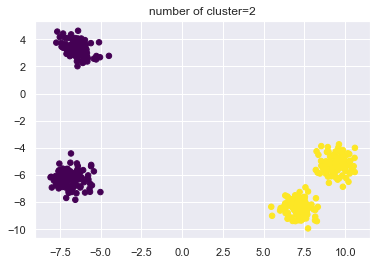

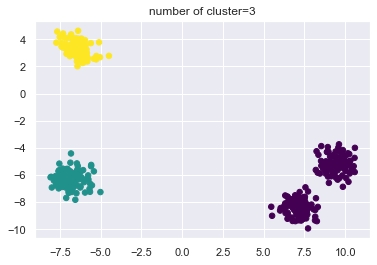

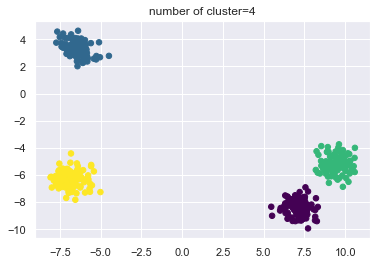

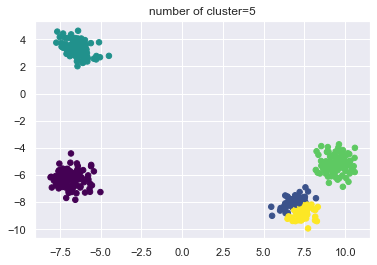

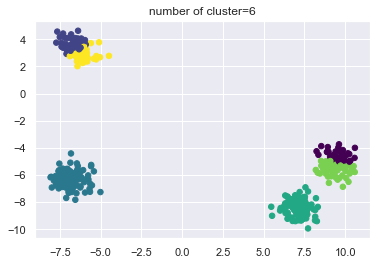

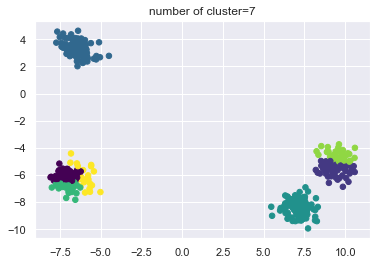

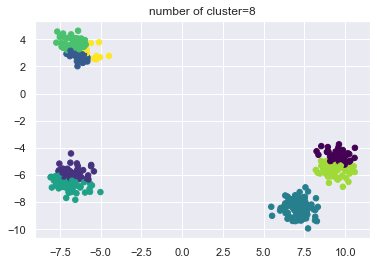

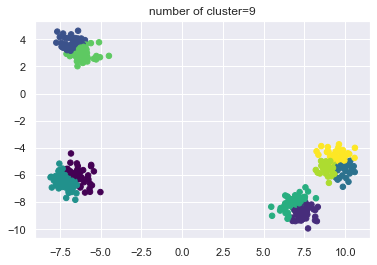

In [5]:
#dataset1
X1, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60)
X1 = X1[:, ::-1] # flip axes for better plotting

for i in range(2, 10):
    gmm = GaussianMixture(n_components=i).fit(X1)
    labels = gmm.predict(X1)
    plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(f'number of cluster={i}')
    plt.show()

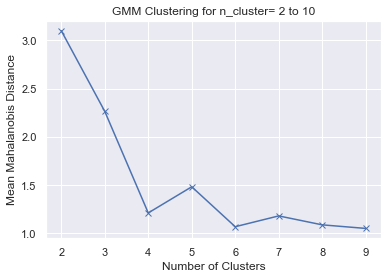

In [6]:
elbow_report(X1)

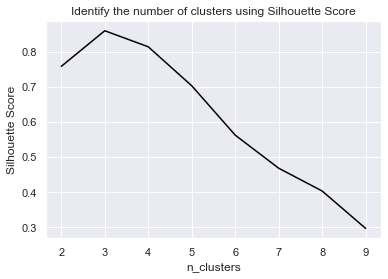

In [10]:
silhouette_score_report(X1)

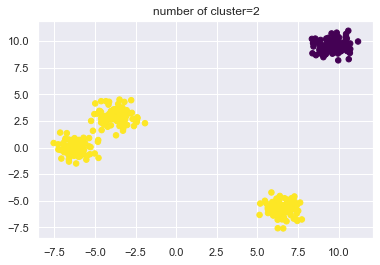

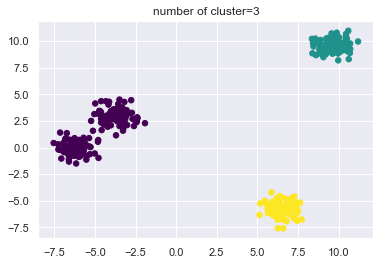

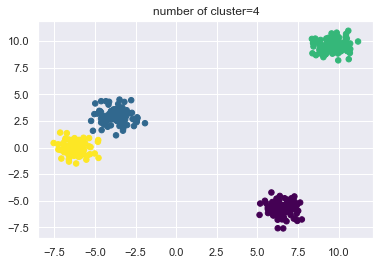

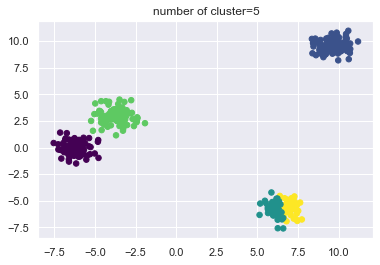

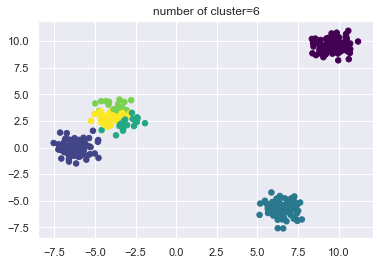

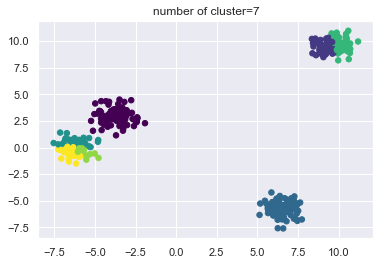

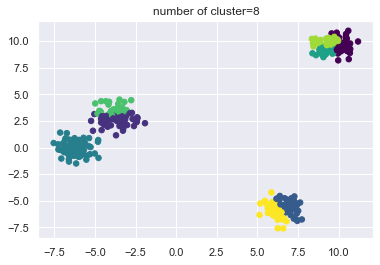

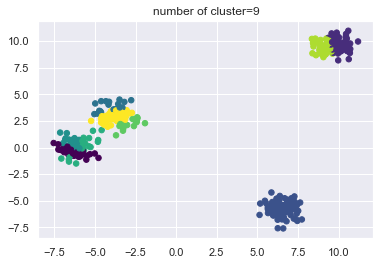

In [7]:
#dataset2
X2, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60)
X2 = X2[:, ::-1]

for i in range(2, 10):
    gmm = GaussianMixture(n_components=i).fit(X2)
    labels = gmm.predict(X2)
    plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(f'number of cluster={i}')
    plt.show()

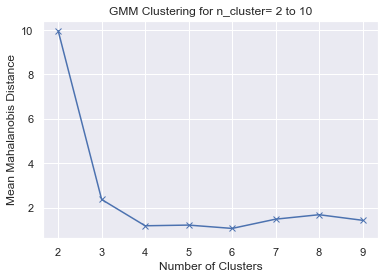

In [8]:
elbow_report(X2)

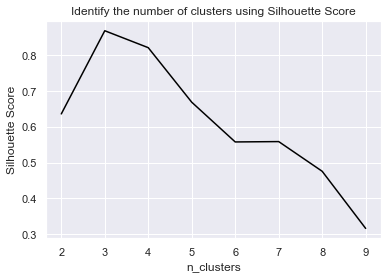

In [9]:
silhouette_score_report(X2)

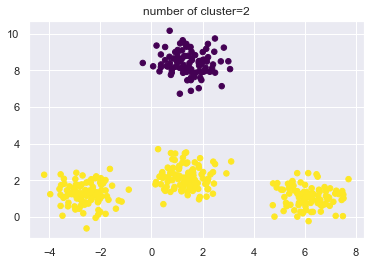

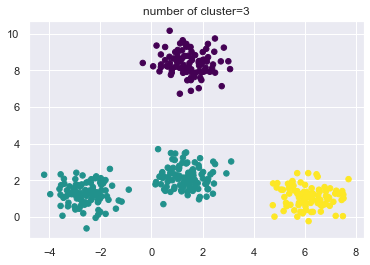

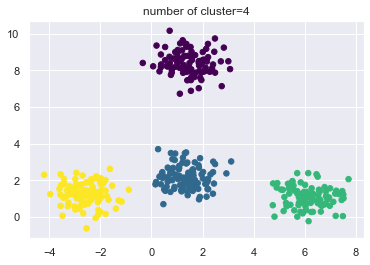

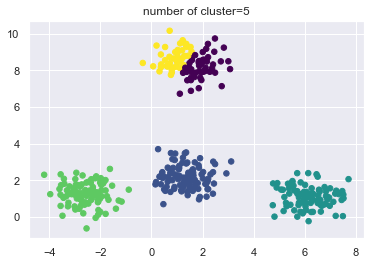

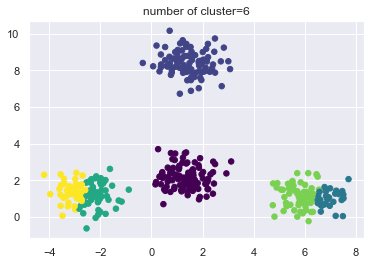

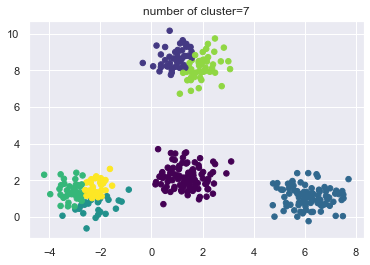

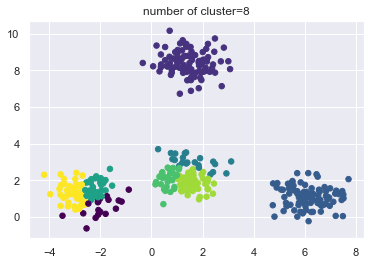

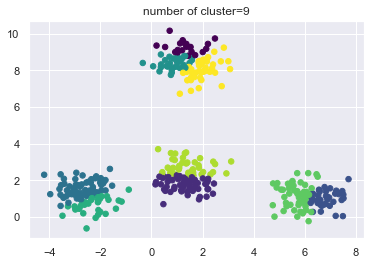

In [11]:
#dataset3
X3, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60)
X = X3[:, ::-1]

for i in range(2, 10):
    gmm = GaussianMixture(n_components=i).fit(X3)
    labels = gmm.predict(X3)
    plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(f'number of cluster={i}')
    plt.show()

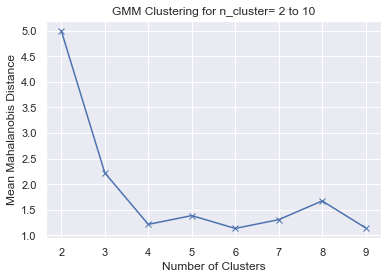

In [12]:
elbow_report(X3)

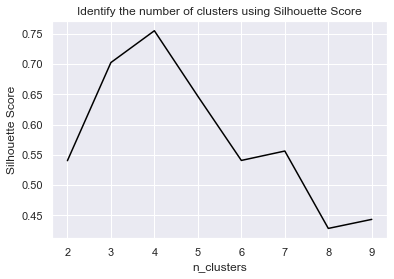

In [13]:
silhouette_score_report(X3)

### Ex 3. Compare kmeans and GMM (cons and pros)

Clustering is a method of unsupervised learning, where each datapoint or cluster is grouped to into a subset or a cluster, which contains similar kind of data points.

- K-Means Clustering:

It is an algorithm, which classifies samples based on attributes/features into K number of clusters. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. Assign the centroid and optimize the centroid based on the distances from the points to it.

Advantages of K-Means:

1. Running Time

2. Better for high dimensional data.

3. Easy to interpret and Implement.

Disadvantages of K-Means:

1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)

2. Hard Assignment might lead to mis grouping.

- Guassian Mixture:

Instead of Hard assigning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

Advantages:

1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.

2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).

Disadvantages:

1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.

2. Difficult to interpret.

### Ex 4. Find 3 examples that GMM is better than kmeans

#### 1. 

The Iris flower data set (150×4) is a multivariate data set introduced by Ronald
Fisher in his 1936 paper. The data set consists of three species of Iris (Iris setosa,
Iris virginica and Iris versicolor) and each of them has 50 samples. Each column
is a feature measured from each sample. They are length and width of the sepals
and petals, in centimetres. Below is the original data plotted with true label.

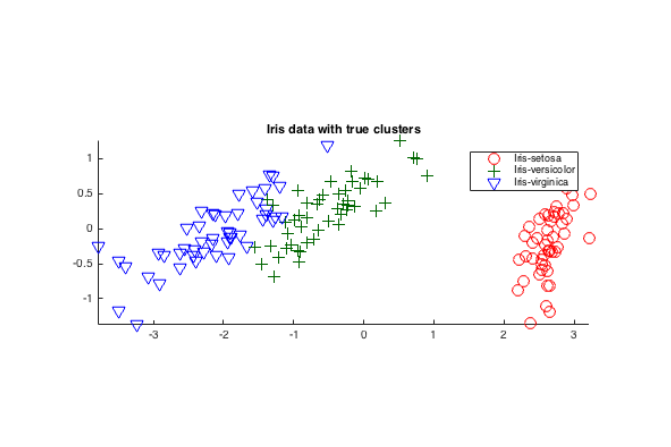

We applied K-means to Iris data set in our homework, and it showed the error rate is 0.1067 which was not good enough. Now, we apply GMM algorithm to it and compare the results of K-means and GMM in the two plots below (Figure 1: K-means Vs. GMM). All the MATLAB code and output would be listed in Appendix.

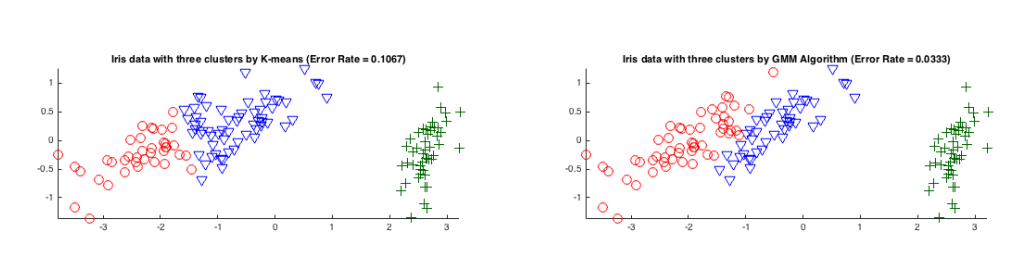

The performance of GMM is better than that of K-means. The three clusters in GMM plot are closer to the original ones. Also, we compute the error rate (percentage of misclassified points) which should be the smaller the better. The Error rate of GMM is 0.0333, while that of K-means is 0.1067. This result is 4 corresponding to the plots.

Let us quickly look at another example which is a toy dataset without true label, but it bring us a big picture of K-means and GMM. Later, we will discuss their pros and cons in the conclusion.

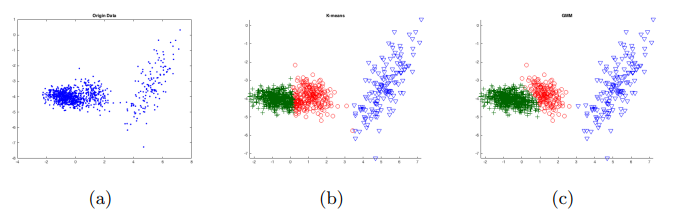